In [3]:
#Gabriel 5/1/2022

# Ignorar

In [1]:
#hide
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [2]:
#hide
# from fastbook import *

# Guardar en Google Drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Tabla de contenidos

- [1 - Librerías](#lib)
- [2 - Paths para Proyecto](#path)
- [3 - Análisis de Datos Exploratorios (EDA)](#eda)
- [4 - Metadata](#meta)
- [5 - Carga de imágenes y metadata](#carga)
- [6 - Preprocesamieto de las imágenes](#prepro)
- [7 - Train/Test split](#traintest)
- [8 - Modelo](#model)

<a name='lib'></a>
## Librerías

In [1]:
from fastai.vision.all import *
from utils_ATSIA import *

import os
import seaborn as sns
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

<a name='path'></a>
## Paths para proyecto

In [2]:
organos = ["AmpollaRectal", "Branquias", "Hepatopancreas", "Intestino", "Uropodo"]
grados = ["G0", "G1", "G2", "G3", "G4"]
caracteristicas = {"AmpollaRectal" :["GG", "N"], #"Gregarinas Gametocistos, Nemátodos"
                   "Branquias" : ["S", "M", "N", "P", "AF"],# "Suciedad, Melanización, Necrosis, Protozoarios y Algas Filamentosas"
                   "Hepatopancreas" : ["DT", "DC", "L", "M", "N"], #"Deformidad Tubular, Desprendimiento Celular, Lípidos, Melanización y Necrosis"
                   "Intestino" : ["GT" "GG", "N", "A", "RC"], #"Gregarinas Trofozoito, Gregarina Gametocistos, Nemátodos, Algas y Restos de Crustaceos"
                   "Uropodo" : ["Prem", "Muda", "Post", "Inte"]}

#Necesitamos la cantidad de caracteres que cada nomenclatura tiene para cada órgano
organo_len = {"AmpollaRectal" : 10, "Branquias" : 25, "Hepatopancreas" : 26, "Intestino" : 27, "Uropodo" :4}

In [4]:
main_path = Path(os.getcwd()) #Cuando estemos en local
Path.BASE_PATH = main_path
# main_path = "/content/drive/MyDrive/ATSIA" #Cuando usamos Google Drive
path = {}
path["data"] = {}
path["img"] = {}
path["metadata"] = {}

for organo in organos: 
    if not os.path.exists(Path(os.path.join("data", organo))):
        os.mkdir(Path(os.path.join("data", organo)))
        
    if not os.path.exists(Path(os.path.join("img", organo))):
        os.mkdir(Path(os.path.join("img", organo)))

    if not os.path.exists(Path(os.path.join("metadata", organo))):
        os.mkdir(Path(os.path.join("metadata", organo)))

for organo in organos:
    path["data"][organo] = Path(os.path.join("data", organo, f"X_{organo}.npy"))
    path["img"][organo] = Path(os.path.join("img", organo))
    path["metadata"][organo] = Path(os.path.join("metadata", organo, f"metadata_{organo}.csv"))



In [6]:
# SIZE = 200

<a name='eda'></a>
## Análisis Exploratorio de Datos (EDA)

In [5]:
count = get_img_count(organos, organo_len, caracteristicas, grados, path)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 130.40it/s]


No hay imágenes en la carpeta img/AmpollaRectal
No hay imágenes en la carpeta img/Branquias


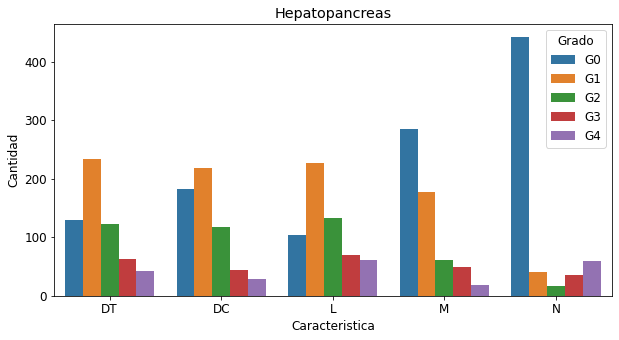

No hay imágenes en la carpeta img/Intestino
No hay imágenes en la carpeta img/Uropodo


In [6]:
for organo in organos: 
    data = count[count["Organo"] == organo]
    if data["Cantidad"].sum() != 0:
        plt.figure(figsize=(10,5))
        sns.barplot(data = data, x = "Caracteristica", y = "Cantidad", hue = "Grado")
        plt.title(f"{organo}", )
        plt.show()
    else:
        print(f"No hay imágenes en la carpeta {path['img'][organo]}")

No hay imágenes en la carpeta img/AmpollaRectal
No hay imágenes en la carpeta img/Branquias


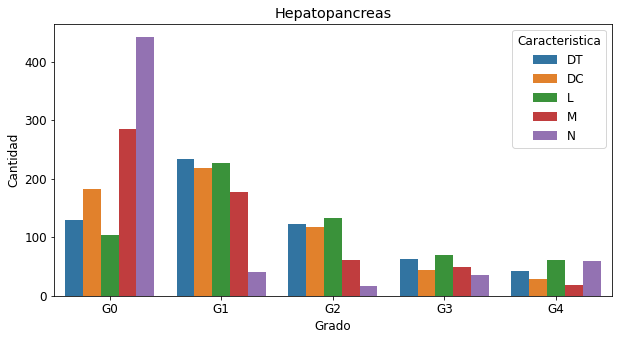

No hay imágenes en la carpeta img/Intestino
No hay imágenes en la carpeta img/Uropodo


In [7]:
for organo in organos: 
    data = count[count["Organo"] == organo]
    if data["Cantidad"].sum() != 0:
        plt.figure(figsize=(10,5))
        sns.barplot(data = data, x = "Grado", y = "Cantidad", hue = "Caracteristica")
        plt.title(f"{organo}", )
        plt.show()
    else:
        print(f"No hay imágenes en la carpeta {path['img'][organo]}")


<a name='meta'></a>
## Metada

In [8]:
#Por el momento vamos a utilizar solo el órgano Hepatopancreas
organo = "Hepatopancreas"

In [9]:
metadata = get_metadata(path = path["img"][organo], organo = organo, organo_len = organo_len)
metadata.to_csv(path_or_buf = path["metadata"][organo], index=False)
metadata

,img_name,labels
0,DT_G3-DC_G0-L_G4-M_G0-N_G0.png,DT_G3 DC_G0 L_G4 M_G0 N_G0
1,DT_G2-DC_G0-L_G2-M_G1-N_G1 (2).png,DT_G2 DC_G0 L_G2 M_G1 N_G1
2,DT_G4-DC_G2-L_G4-M_G3-N_G4 (7).png,DT_G4 DC_G2 L_G4 M_G3 N_G4
3,DT_G1-DC_G4-L_G2-M_G4-N_G1 (2).png,DT_G1 DC_G4 L_G2 M_G4 N_G1
4,DT_G1-DC_G0-L_G1-M_G0-N_G0 (13).png,DT_G1 DC_G0 L_G1 M_G0 N_G0
...,...,...
587,DT_G0-DC_G1-L_G3-M_G0-N_G2.png,DT_G0 DC_G1 L_G3 M_G0 N_G2
588,DT_G0-DC_G0-L_G1-M_G0-N_G0 (9).png,DT_G0 DC_G0 L_G1 M_G0 N_G0
589,DT_G2-DC_G1-L_G3-M_G2-N_G3.png,DT_G2 DC_G1 L_G3 M_G2 N_G3
590,DT_G1-DC_G2-L_G1-M_G2-N_G0 (2).png,DT_G1 DC_G2 L_G1 M_G2 N_G0


<a name='carga'></a> 
## Carga de imágenes y metadata 

In [10]:
metadata_csv = pd.read_csv(path["metadata"][organo], sep = ",")
metadata_csv.sample(3)

,img_name,labels
499,DT_G2-DC_G1-L_G2-M_G0-N_G1.png,DT_G2 DC_G1 L_G2 M_G0 N_G1
587,DT_G0-DC_G1-L_G3-M_G0-N_G2.png,DT_G0 DC_G1 L_G3 M_G0 N_G2
195,DT_G1-DC_G0-L_G3-M_G0-N_G0.png,DT_G1 DC_G0 L_G3 M_G0 N_G0


### Constructing a DataBlock

In [26]:
# # check for mislabelled data
# b = []

# for i,v in enumerate(metadata_csv["labels"]):
#     a = v.split(" ")
#     for val in a:
#         if val not in b:
#             b.append(val)
#             if val == "N_G0.":
#                 print(v)
# b

In [11]:
img = PILImage(PILImage.create("TEST_IMAGE.png").resize((600,400)))
timg = TensorImage(array(img)).permute(2,0,1).float()/255.
def _batch_ex(bs): return TensorImage(timg[None].expand(bs, *timg.shape).clone())

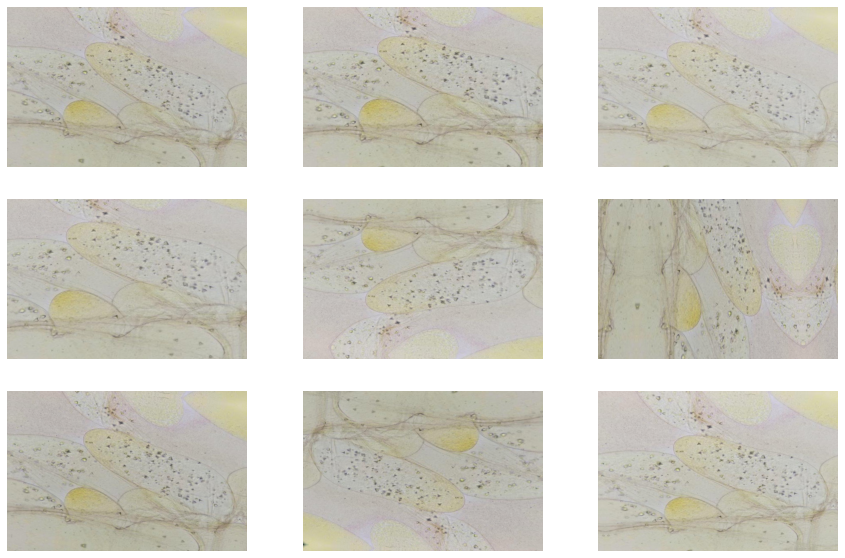

In [12]:
tfms = aug_transforms(mult=1.0, 
                      do_flip=True, 
                      flip_vert=True, 
                      max_rotate=10.0, 
                      min_zoom=1.0, 
                      max_zoom=1.2, 
                      max_lighting=0.1, 
                      max_warp=0.1, 
                      p_affine=0.75, 
                      p_lighting=0.75, 
                      xtra_tfms=None, 
                      mode='bilinear', 
                      pad_mode='reflection', 
                      align_corners=True, 
                      batch=False, 
                      min_scale=1.0)
y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(3,3, figsize=(15,10))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)

In [13]:
def get_x(r): return Path(path["img"][organo], r['img_name'])
def get_y(r): return r['labels'].split(" ")


dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = get_x, 
                   get_y = get_y, 
                   item_tfms = Resize(500),
                   splitter = RandomSplitter(valid_pct=0.2, seed=42),
                   batch_tfms =[*aug_transforms(mult=1.0,
                                              do_flip=True,
                                              flip_vert=True,
                                              max_rotate=10.0, 
                                              min_zoom=1.0, 
                                              max_zoom=1.2, 
                                              max_lighting=0.1, 
                                              max_warp=0.1, 
                                              p_affine=0.75, 
                                              p_lighting=0.75,  
                                              mode='bilinear', 
                                              pad_mode='reflection', 
                                              align_corners=True, 
                                              batch=False, 
                                              min_scale=1.0),Normalize.from_stats(*imagenet_stats)]
                   )
dsets = dblock.datasets(metadata_csv)
dsets.train[0]
# dsets.valid[0]

(PILImage mode=RGB size=2040x1528,
 TensorMultiCategory([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [16]:
idxs = torch.where(dsets.train[0][1] == 1.)[0]
dsets.train.vocab[idxs]

(#5) ['DC_G1','DT_G1','L_G2','M_G1','N_G0']

And now we can display a sample of our data:

In [17]:
dls = dblock.dataloaders(metadata_csv, bs=16)

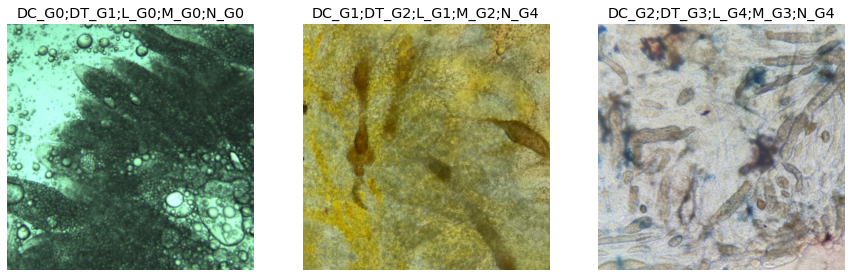

In [18]:
dls.show_batch(nrows=1, ncols=3, figsize=(15,10))

In [19]:
dls.valid.items

,img_name,labels
86,DT_G0-DC_G0-L_G0-M_G0-N_G0 (14).png,DT_G0 DC_G0 L_G0 M_G0 N_G0
231,DT_G1-DC_G1-L_G0-M_G2-N_G0.png,DT_G1 DC_G1 L_G0 M_G2 N_G0
128,DT_G1-DC_G2-L_G1-M_G3-N_G0.png,DT_G1 DC_G2 L_G1 M_G3 N_G0
17,DT_G0-DC_G0-L_G1-M_G0-N_G0 (6).png,DT_G0 DC_G0 L_G1 M_G0 N_G0
442,DT_G1-DC_G1-L_G1-M_G0-N_G0 (23).png,DT_G1 DC_G1 L_G1 M_G0 N_G0
...,...,...
276,DT_G2-DC_G0-L_G1-M_G0-N_G0 (2).png,DT_G2 DC_G0 L_G1 M_G0 N_G0
268,DT_G1-DC_G3-L_G2-M_G0-N_G0.png,DT_G1 DC_G3 L_G2 M_G0 N_G0
30,DT_G0-DC_G0-L_G0-M_G0-N_G0 (12).png,DT_G0 DC_G0 L_G0 M_G0 N_G0
424,DT_G0-DC_G0-L_G0-M_G0-N_G0 (18).png,DT_G0 DC_G0 L_G0 M_G0 N_G0


### Binary Cross-Entropy

In [20]:
def atsia_acc(preds, targs):
    columns= ["acc_dc","acc_dt", "acc_l", "acc_m", "acc_n"]
    acc = pd.DataFrame(np.zeros((len(preds), len(columns))), columns = columns)
    for i in range(0, len(preds)):
        
        cat1_preds = preds[i][:5]
        cat1_targs = targs[i][:5]

        cat2_preds = preds[i][5:10]
        cat2_targs = targs[i][5:10]

        cat3_preds = preds[i][10:15]
        cat3_targs = targs[i][10:15]

        cat4_preds = preds[i][15:20]
        cat4_targs = targs[i][15:20]

        cat5_preds = preds[i][20:]
        cat5_targs = targs[i][20:]
        
        if torch.eq(cat1_preds.argmax(), cat1_targs.argmax()):
            acc["acc_dc"][i] = 1
        if torch.eq(cat2_preds.argmax(), cat2_targs.argmax()):
            acc["acc_dt"][i] = 1
        if torch.eq(cat3_preds.argmax(), cat3_targs.argmax()):
            acc["acc_l"][i] = 1 
        if torch.eq(cat4_preds.argmax(), cat4_targs.argmax()):
            acc["acc_m"][i] = 1
        if torch.eq(cat5_preds.argmax(), cat5_targs.argmax()):
            acc["acc_n"][i] = 1
        
    return acc.describe().loc["mean"].mean()

In [21]:
learn = cnn_learner(dls, resnet101, metrics = atsia_acc)#partial(accuracy_multi, thresh=0.7)) 
#usamos partial para indicar un nuevo parametros a la función accuracy_multi que tiene como default thresh = 0.5
#Usa la funcion de perdida de BCEWithLogitsLoss automáticamente al ser multi-label classification

In [22]:
dls.loss_func??

In [23]:
dls.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [24]:
learn.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [ ]:
class BCEWithLogitsLossFlat(BaseLoss):
    "Same as `nn.BCEWithLogitsLoss`, but flattens input and target."
    @use_kwargs_dict(keep=True, weight=None, reduction='mean', pos_weight=None)
    def __init__(self, *args, axis=-1, floatify=True, thresh=0.5, **kwargs):
        if kwargs.get('pos_weight', None) is not None and kwargs.get('flatten', None) is True:
            raise ValueError("`flatten` must be False when using `pos_weight` to avoid a RuntimeError due to shape mismatch")
        if kwargs.get('pos_weight', None) is not None: kwargs['flatten'] = False
        super().__init__(nn.BCEWithLogitsLoss, *args, axis=axis, floatify=floatify, is_2d=False, **kwargs)
        self.thresh = thresh

    def decodes(self, x):    
        return x>self.thresh
    def activation(self, x): return torch.sigmoid(x)

In [ ]:
# learn.loss_func = BCEWithLogitsLossFlat()

SuggestedLRs(valley=0.001737800776027143)

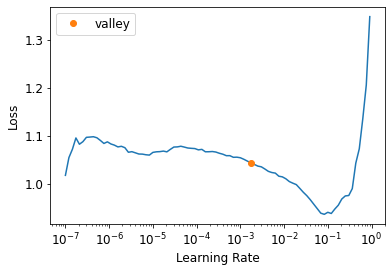

In [34]:
learn.lr_find()

In [25]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,atsia_acc,time
0,0.987434,0.855495,0.349153,01:01
1,0.903204,1.099450,0.433898,01:00
2,0.835857,0.796860,0.454237,00:58


In [ ]:
# cbs = [EarlyStoppingCallback(monitor='atsia_acc', patience=6),
#        SaveModelCallback(monitor='atsia_acc', fname = 'model_test'),
#        ReduceLROnPlateau(monitor='atsia_acc', patience=3)]
cbs = [SaveModelCallback(monitor='atsia_acc', fname = 'model_test')]
learn.fine_tune(30, base_lr=1e-2, freeze_epochs=5, cbs = cbs)

epoch,train_loss,valid_loss,atsia_acc,time
0,0.179259,0.436337,0.596610,00:58
1,0.175492,0.430464,0.594915,00:59
2,0.180000,0.485714,0.600000,01:00
3,0.185761,0.531745,0.572881,00:58
4,0.205350,0.541607,0.577966,01:00


Better model found at epoch 0 with atsia_acc value: 0.5966101694915255.
Better model found at epoch 2 with atsia_acc value: 0.6.


epoch,train_loss,valid_loss,atsia_acc,time
0,0.191757,0.520327,0.576271,01:06
1,0.186348,0.510842,0.549153,01:06
2,0.177081,0.475129,0.581356,01:06
3,0.183477,0.506716,0.594915,01:07
4,0.199187,0.586964,0.544068,01:07
5,0.229127,0.497939,0.561017,01:07
6,0.258225,0.492995,0.571186,01:07
7,0.262750,0.463067,0.571186,01:07
8,0.267627,0.469969,0.528814,01:06
9,0.265756,0.450439,0.579661,01:06


Better model found at epoch 0 with atsia_acc value: 0.5762711864406779.
Better model found at epoch 2 with atsia_acc value: 0.5813559322033898.
Better model found at epoch 3 with atsia_acc value: 0.5949152542372882.


In [ ]:
learn.metrics = atsia_acc
learn.validate()

If you pick a threshold that's too high, you'll only be selecting the objects for which your model is very confident:

We can find the best threshold by trying a few levels and seeing what works best. This is much faster if we just grab the predictions once:

In [43]:
preds,targs = learn.get_preds()

Then we can call the metric directly. Note that by default `get_preds` applies the output activation function (sigmoid, in this case) for us, so we'll need to tell `accuracy_multi` to not apply it:

In [44]:
preds[0]

TensorBase([9.9997e-01, 5.9812e-07, 3.4063e-04, 7.7822e-05, 5.5217e-07, 9.9833e-01, 9.5476e-04, 3.4041e-06, 8.6924e-06, 9.9573e-07, 9.9987e-01, 3.1904e-03, 3.3058e-03, 3.6239e-07, 3.1195e-04, 9.9981e-01,
        9.4933e-06, 1.3944e-06, 1.4299e-04, 9.3804e-08, 1.0000e+00, 7.6333e-09, 3.7197e-11, 3.1291e-06, 6.6569e-08])

In [45]:
targs[0]

TensorMultiCategory([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

We didn't specify a loss function, which means we're getting whatever fastai chooses as the default. Let's see what it picked for us:

In [ ]:
learn.lr_find()

We'll try an LR of 1e-2:

In [ ]:
lr = 5e-5
learn.fine_tune(5, lr)

This sounds very accurate! But it's important to take a look at our results with `Learner.show_results`. The left side are the actual (*ground truth*) coordinates and the right side are our model's predictions:

In [ ]:
preds.shape

In [ ]:
def preds_norm (preds):
    cat = np.array(np.zeros(preds.shape))
    
    for i in range(0, len(preds)-1):
        
        cat1_preds = preds[i][:5]
        
        cat2_preds = preds[i][5:10]

        cat3_preds = preds[i][10:27]

        cat4_preds = preds[i][27:32]

        cat5_preds = preds[i][32:]

        cat1_preds_new = np.zeros(len(cat1_preds))
        cat1_preds_new[cat1_preds.argmax()] = 1
        
        cat2_preds_new = np.zeros((len(cat2_preds)))
        cat2_preds_new[cat2_preds.argmax()] = 1

        cat3_preds_new = np.zeros((len(cat3_preds)))
        cat3_preds_new[cat3_preds.argmax()] = 1

        cat4_preds_new = np.zeros((len(cat4_preds)))
        cat4_preds_new[cat4_preds.argmax()] = 1

        cat5_preds_new = np.zeros((len(cat5_preds)))
        cat5_preds_new[cat5_preds.argmax()] = 1
#         print(i)
        
#         print(cat1_preds_new, cat2_preds_new, cat3_preds_new, cat4_preds_new, cat5_preds_new)
        cat[i] = np.concatenate((cat1_preds_new, cat2_preds_new, cat3_preds_new, cat4_preds_new, cat5_preds_new), axis = 0)
    return cat


In [ ]:
preds_norm_1 = preds_norm(preds)
preds_norm_1 = torch.from_numpy(preds_norm_1)
preds_norm_1[0]

In [ ]:
targs[0]

In [ ]:
acc_prueba = atsia_acc(preds_norm_1, targs)
acc_prueba

In [ ]:
acc = atsia_acc(preds, targs)
acc

In [181]:
# def preds_norm (preds):
#     cat = np.array(np.zeros(preds.shape))
    
#     for i in range(0, len(preds)-1):
        
#         cat1_preds = preds[i][:5]
        
#         cat2_preds = preds[i][5:10]

#         cat3_preds = preds[i][10:27]

#         cat4_preds = preds[i][27:32]

#         cat5_preds = preds[i][32:]

#         cat1_preds_new = np.zeros(len(cat1_preds))
#         cat1_preds_new[cat1_preds.argmax()] = 1
        
#         cat2_preds_new = np.zeros((len(cat2_preds)))
#         cat2_preds_new[cat2_preds.argmax()] = 1

#         cat3_preds_new = np.zeros((len(cat3_preds)))
#         cat3_preds_new[cat3_preds.argmax()] = 1

#         cat4_preds_new = np.zeros((len(cat4_preds)))
#         cat4_preds_new[cat4_preds.argmax()] = 1

#         cat5_preds_new = np.zeros((len(cat5_preds)))
#         cat5_preds_new[cat5_preds.argmax()] = 1
# #         print(i)
        
# #         print(cat1_preds_new, cat2_preds_new, cat3_preds_new, cat4_preds_new, cat5_preds_new)
#         cat[i] = np.concatenate((cat1_preds_new, cat2_preds_new, cat3_preds_new, cat4_preds_new, cat5_preds_new), axis = 0)
#     return cat

# def show_results2(ds_idx=1, dl=None, max_n=9, shuffle=True, **kwargs):
#         if dl is None: dl = dls[ds_idx].new(shuffle=shuffle)
#         b = dl.one_batch()
#         _,_,preds = learn.get_preds(dl=[b], with_decoded=True)
#         preds_atsia = preds_norm(preds)
#         preds_atsia = torch.from_numpy(preds_atsia)
#         dls.show_results(b, preds_atsia, max_n=max_n, **kwargs)

In [ ]:
preds[0][:5]

In [ ]:
targs[0][:5]

In [ ]:
fnames=get_image_files(path["img"][organo])
learn.predict(fnames[1])

In [ ]:
fnames[1]

In [ ]:
dls.train.items

In [100]:
learn.get_preds??

In [37]:
learn.load(Path("model_test"))

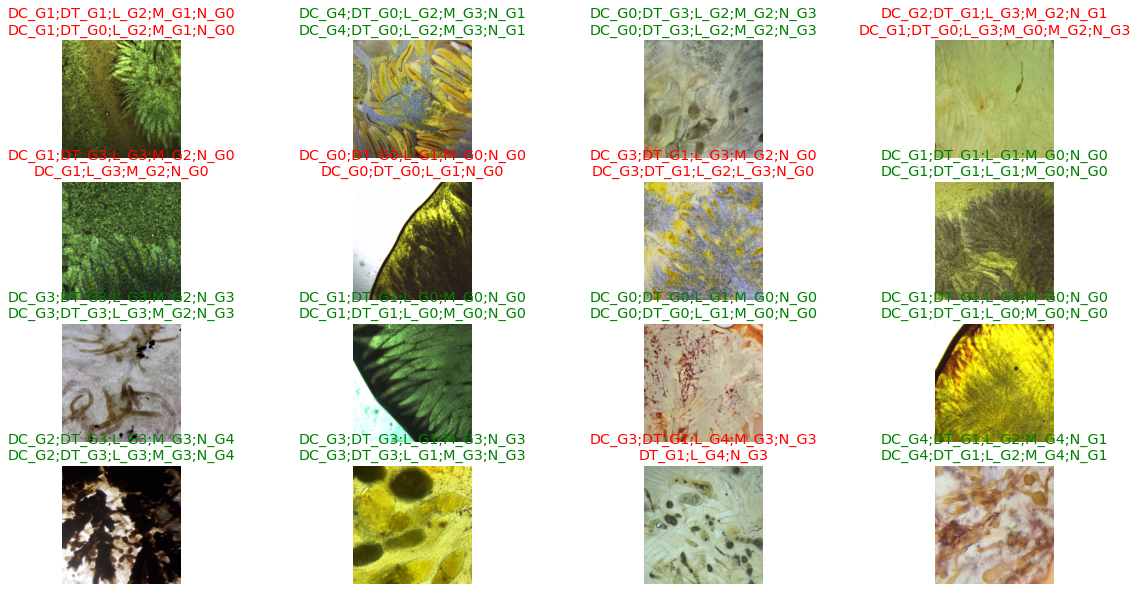

In [39]:
learn.show_results(ds_idx = 0, max_n = 16, figsize = (20,10), shuffle=False)

## Conclusion

In problems that are at first glance completely different (single-label classification, multi-label classification, and regression), we end up using the same model with just different numbers of outputs. The loss function is the one thing that changes, which is why it's important to double-check that you are using the right loss function for your problem.

fastai will automatically try to pick the right one from the data you built, but if you are using pure PyTorch to build your `DataLoader`s, make sure you think hard when you have to decide on your choice of loss function, and remember that you most probably want:

- `nn.CrossEntropyLoss` for single-label classification
- `nn.BCEWithLogitsLoss` for multi-label classification
- `nn.MSELoss` for regression